In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

In [9]:
initial_n = 1000 #number of males = number of females
n_generations  = 10
n_experiments = 200
"""
We consider a single gene with the following assumptions:
1. The gene is initially distributed uniformly for both males and females.
2. The gene fully determines the 'fitness' of the individual (probability
    to reproduce)
3. Females only mate with males that have a higher 'fitness' than her.
4. The offspring will have the gene of one of its parents chosen at 
    random (50/50)
5. Individuals mate only within their generation
6. A generation stops reproducing when size of the new generation 
    is equal to the old (assumed for simplicty)
"""
means = np.zeros((n_experiments, 2))
deviations = np.zeros((n_experiments, 2)) 

for k in tqdm(range(n_experiments)):
    # Initialize population
    M = np.random.uniform(size=initial_n)
    F = np.random.uniform(size=initial_n)
    for i in range(n_generations):
        # Females with offspring
        F_parents = np.random.choice(F, len(F)*2,
                                     replace=True, p=F/np.sum(F))
        M_parents = np.zeros(len(F)*2)
        # for every female an appropiate mate is chosen
        for i, f in enumerate(F_parents):
            # Choose another female if there is no appropiate mate
            while len(M[M > f]) == 0:
                f = np.random.choice(F, 1, replace=True, p=F/np.sum(F))[0]
            m = np.random.choice(M[M > f], 1,
                                 p=M[M > f]/np.sum(M[M > f]))
            M_parents[i] = m
        transfered_gene = np.random.choice([0,1], len(F_parents))
        parents = np.c_[M_parents, F_parents]
        # choose the gene transfered for each of the offspring
        offspring = parents[np.arange(len(parents)), transfered_gene]
        # Divide offspring in male and female, order shouldn't matter
        M = offspring[0: len(offspring)//2]
        F = offspring[len(offspring)//2:]
        # Record relevant statistics for each experiment k
        means[k, 0] = np.mean(M)
        means[k, 1] = np.mean(F)
        deviations[k, 0] = np.std(M)
        deviations[k, 1] = np.std(F)

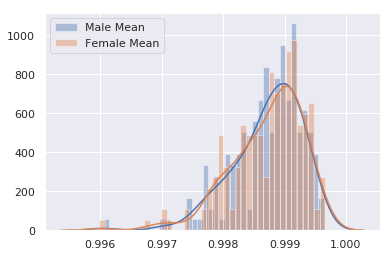

In [14]:
sns.distplot(means[:,0], bins=40, kde=True, label='Male Mean')
sns.distplot(means[:,1], bins=40, kde=True, label='Female Mean')
plt.legend()

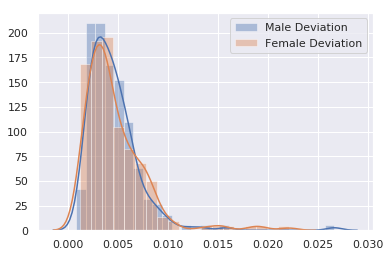

In [15]:
sns.distplot(deviations[:,0], label='Male Deviation')
sns.distplot(deviations[:,1], label='Female Deviation')
plt.legend()

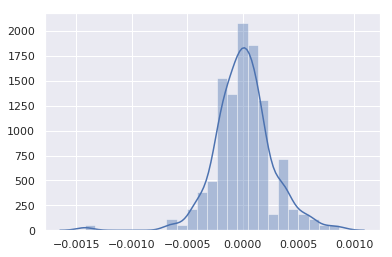

In [16]:
sns.distplot(means[:, 0] - means[:, 1])

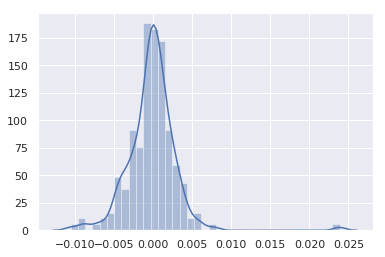

In [17]:
sns.distplot(deviations[:, 0] - deviations[:, 1])

In [20]:
18*12 + 9 - 95

130

In [19]:
225-130

95